## Spark Structured Query Language
### and
## Spark Dataframes

Spark SQL Intro
Spark SQL is a Spark module for structured data processing. One use of Spark SQL is to execute SQL queries. Spark SQL provides more information about the structure of data and its computation. It provides a programming abstraction called DataFrames.

It supports querying data either via SQL or via the Hive Query Language. For those familiar with RDBMS, Spark SQL will be an easy transition from your earlier tools where you can extend the boundaries of traditional relational data processing.  Spark SQL supports relational, structured, semi-structured, and unstructured data, making it easy to run SQL queries on them.
There are two ways to manipulate data:
Dataframe / Dataset.
SQL query.

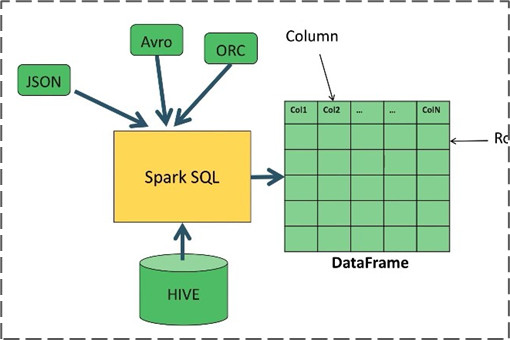

Spark SQL is capable of:
Loading data from a variety of structured sources.
Querying data using SQL statements, both inside a Spark program and from external tools that connect to Spark SQL through standard database connectors (JDBC/ODBC) (e.g., using business intelligence tools like Tableau). 
Providing rich integration between SQL and regular Python/Java/Scala code, including the ability to join RDDs and SQL tables, and expose custom functions in SQL and more.

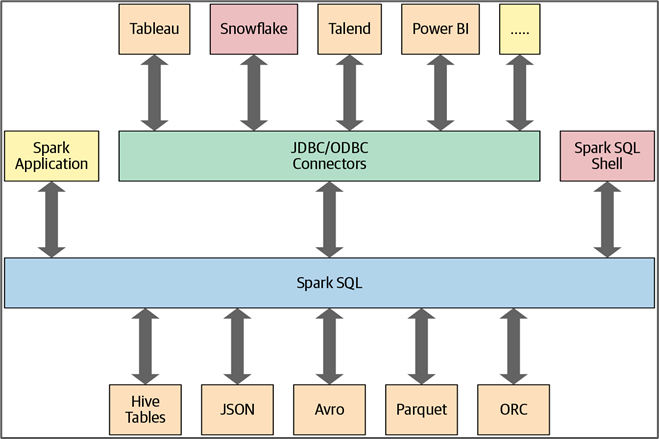


RDD (Spark1.0) —> Dataframe(Spark1.3) —> Dataset(Spark1.6).
Dataset is an extension of DataFrame; thus, we can consider a DataFrame an untyped view of a dataset.


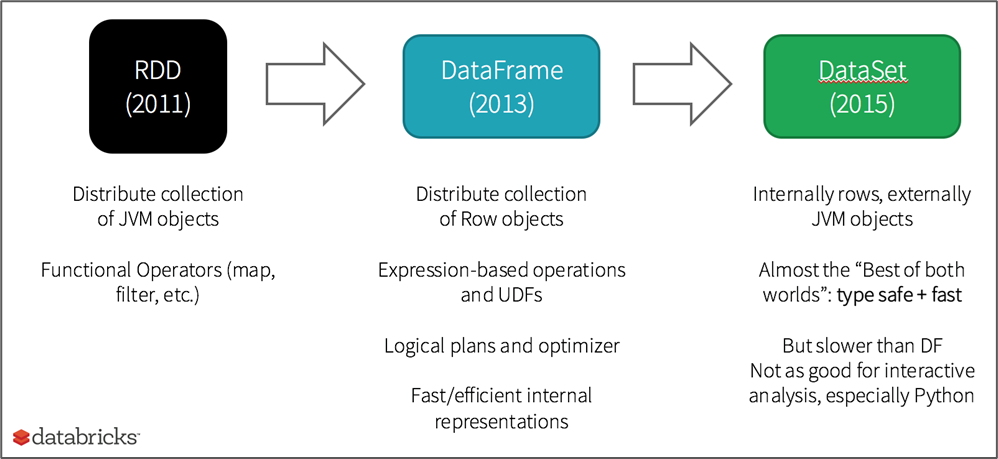

## Overview to Dataframe API/Library


Spark SQL introduced a tabular data abstraction called a DataFrame since Spark 1.3.
DataFrames are similar to the table in a relational database but with more optimizations. The DataFrame is a distributed collection of rows (row types) with the same schema.
Data is described as a DataFrame with rows, columns, and a schema . 
DataFrame = RDD + Schema:
The idea behind DataFrame is that it allows for the processing of a large amount of structured data. DataFrame is an abstraction, which gives a schema view of data. This means that it gives us a view of data as columns, with column name and type information. We can think of data in DataFrame similar to a table in a database.
DataFrame in Apache Spark prevails over RDD but contains the features of RDD. The features common to RDD and DataFrame are immutability, in-memory, resilient, and  have distributed computing capability. It allows the user to impose the structure onto a distributed collection of data; thus providing higher-level abstraction. 
DataFrame in Apache Spark was designed for modern big data and data science applications, taking its inspiration from data.frame in R and pandas in Python.

### A DataFrame in Apache Spark can be created in multiple ways:
Create DataFrame from Data source (e.g., load the data from JSON or CSV).
Create DataFrame from an existing or new RDD.
Programmatically specify schema.

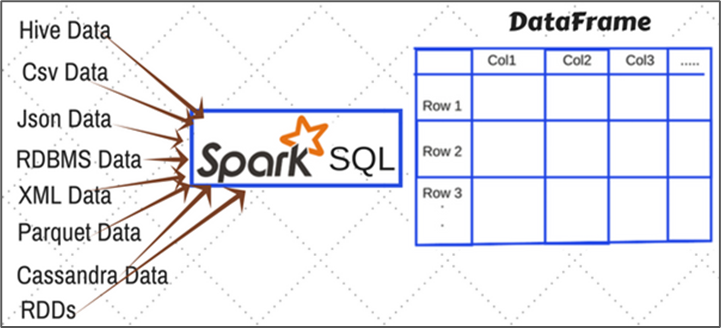

### Dataset API
●	A dataset is an extension of DataFrame; thus, we can consider a DataFrame an untyped view of a dataset.
●	A dataset is a distributed collection of data. Dataset API is a set of operators with typed and untyped transformations and actions to work with a structured query (as a Dataset) as a whole.
●	The dataset new interface added in Spark 1.6 combines RDD (strong typing, powerful lambda functions) and PySpark SQL's efficient execution engine.
●	Scala and Java have the Dataset API, but  **Python does not have the support for the Dataset API**. Due to Python's dynamic nature, many of the benefits of the Dataset API are already available.

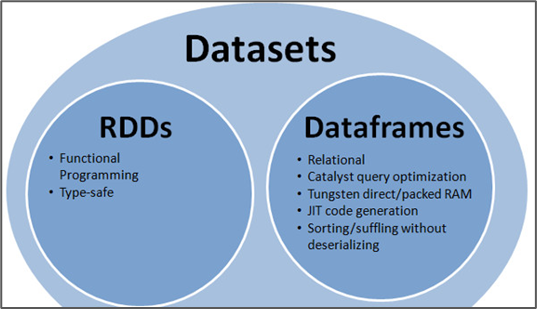



### Pandas VS Pyspark dateframe
Pandas and PySpark DataFrames are designed for structural and semistructral data processing. They share similar properties, but there are a few significant differences:
- Operations in Pyspark run parallel on different nodes in cluster. In Pandas, this is not possible.
- Operations in PySpark are lazy (slow) in nature. In Pandas, we get the result as soon as we apply any operation.
- Pandas is mutable; PySpark is immutable.
- Pandas API supports more operations than PySpark DataFrame; however, Pandas API is more powerful than PySpark.
- Complex operations in Pandas are easier to perform than PySpark operations because Pandas API supports more operations than PySpark API.

In addition, Pandas and Pyspark DataFrames have some basic differences such as columns selections, filtering, adding columns, etc.



Spark SQL (pyspark) Dataframe Video:
Click here to play → https://www.youtube.com/watch?v=FcAiK2VtPfA



## Spark Session

- Since Spark 2.0 SparkSession is an entry point to underlying Spark functionality. All functionality available with SparkContext is also available in SparkSession. Also, it provides APIs to work on DataFrames and Datasets.
- With a SparkSession, applications can create DataFrames from an existing RDD or from different Spark data sources.
- Spark Session also includes all of the APIs available in different contexts:
    ●  	Spark Context.
    ●	SQL Context.
    ●	Streaming Context.
    ●	Hive Context.

- To issue any SQL query, use the sql() method on the SparkSession instance, such as spark.sql("SELECT * FROM myTableName"). All spark.sql() queries executed in this manner return a DataFrame on which you may perform further Spark operations.
- getOrCreate() method is used to get an existing SparkSession. If there is no existing SparkSession, create a new one based on the options set in the builder.

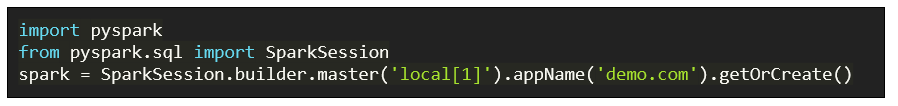


import pyspark

from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[1]').appName('demo.com').getOrCreate()


- You can create as many SparkSessions as you like in a Spark application by using either SparkSession.builder() or SparkSession.newSession().
- appName() – Sets a name to the Spark application that shows in the Spark web UI. If no application name is set, it sets a random name.
-  We can stop SparkSession by using the line below:
spark.stop()

### SparkSession Commonly used methods

- catalog – Returns the catalog object to access metadata.
- builder() – Used to create a new SparkSession: SparkSession.Builder
- createDataFrame() – Creates a DataFrame from a collection and an RDD.
- getActiveSession() – Returns an active SparkSession for the current thread.
- read() – Returns an instance of DataFrameReader class, which is used to read records from CSV, Parquet, Avro, and more file formats into DataFrame.
- sparkContext() – Returns a SparkContext.
- sql(String sql) – Returns a DataFrame after executing the SQL mentioned.
- sqlContext() – Returns SQLContext.
- stop() – Stops the current SparkContext.
- table() – Returns a DataFrame of a table or view.




## Spark SQL Built-in Standard Functions
Spark SQL provides several built-in, standard functions libraries named “spark.sql.functions” to work with DataFrame/Dataset and SQL queries for Data manipulation and Data analyzing. 
In order to use these SQL standard functions, you need to import the below PySpark module/package into your application.

- from pyspark.sql.functions import [moduleName]

Example: 

- from pyspark.sql.functions import mean
- from pyspark.sql.functions import year
- from pyspark.sql.functions import avg
- from pyspark.sql.functions import min, max

all function

from pyspark.sql.functions import*


## Creating DataFrame

A DataFrame in Apache Spark can be created multiple ways:

1.	Create DataFrame from Existing or new RDD: You can manually create a PySpark DataFrame using toDF() and createDataFrame(); bothof  these methods take different signatures in order to create DataFrame from existing RDD, list, and DataFrame.

2.	Create DataFrame from Data source: You can create PySpark DataFrame from data sources such as RDBMS(MariaDB), TXT file, CSV file, JSON file,  Avro file, Parquet file, and XML file formats by reading from HDFS, S3, DBFS, Azure Blob file systems, etc.




If we read/access data from any external source such as CSV or JSON, we must first create a DataFrameReader. A DataFrameReader is the foundation for reading data in Spark; it can be accessed via the attribute spark.read

Basic Syntax

#JSON Example
dataframe = sc.read.json('path/nyt2.json')

#TXT FILES Example 
dataframe_txt = sc.read.text('path/text_data.txt')

#CSV FILES Example# 
dataframe_csv = sc.read.load('path/csv_data.csv')

#PARQUET FILES Example# 
dataframe_parquet = sc.read.load('path/parquet_data.parquet')



In [1]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
simpleData = [("James","Sales","NY",90000,34,10000), \
    ("Michael","Sales","NY",86000,56,20000), \
    ("Robert","Sales","CA",81000,30,23000), \
    ("Maria","Finance","CA",90000,24,23000)]

columns = ["employee_name","department","state","salary","age","bonus"]
# ------Creating data frame Using createDataFrame() function-----
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate=False)

# datatype long type is 8 bytes (64 bits).


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
+-------------+----------+-----+------+---+-----+



In [2]:
import pandas as pd
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

student_dict = {"id": [1001, 1002, 1003],"name": [ "Young", "James", "Haseeb"],"city": [ "Rego Park", "Bronx", "Astoria"]}

# --- panda dataframe ----
pd_df = pd.DataFrame(student_dict)
print(pd_df)


# ----- SparkSQL dataframe-----
sp_df = spark.createDataFrame(pd_df)
sp_df.printSchema()
sp_df.show()


     id    name       city
0  1001   Young  Rego Park
1  1002   James      Bronx
2  1003  Haseeb    Astoria
root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- city: string (nullable = true)

+----+------+---------+
|  id|  name|     city|
+----+------+---------+
|1001| Young|Rego Park|
|1002| James|    Bronx|
|1003|Haseeb|  Astoria|
+----+------+---------+



Let’s review some examples of how to Create DataFrame from Data sources, 
such as RDBMS(MariaDB), CSV file, JSON file, Text Files, CSV and TSV Files, and Sequence, etc.

In real time, you create a DataFrame from data source files such as CSV, Text, JSON, XML, etc. PySpark, by default, supports many data formats out of the box without importing any libraries. To create DataFrame, you need to use the appropriate method available in DataFrame spark.read() class.

In [3]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()
df = spark.read.load("RealEstate.csv", format="csv", header = True,inferSchema = True)
df.printSchema()
df.show()


root
 |-- MLS: integer (nullable = true)
 |-- Location: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Bedrooms: integer (nullable = true)
 |-- Bathrooms: integer (nullable = true)
 |-- Size: integer (nullable = true)
 |-- Price SQ Ft: double (nullable = true)
 |-- Status: string (nullable = true)

+------+------------------+--------+--------+---------+----+-----------+----------+
|   MLS|          Location|   Price|Bedrooms|Bathrooms|Size|Price SQ Ft|    Status|
+------+------------------+--------+--------+---------+----+-----------+----------+
|132842|     Arroyo Grande|795000.0|       3|        3|2371|      335.3|Short Sale|
|134364|       Paso Robles|399000.0|       4|        3|2818|     141.59|Short Sale|
|135141|       Paso Robles|545000.0|       4|        3|3032|     179.75|Short Sale|
|135712|         Morro Bay|909000.0|       4|        4|3540|     256.78|Short Sale|
|136282|Santa Maria-Orcutt|109900.0|       3|        1|1249|      87.99|Short Sale|
|136431|

The inferSchema and header parameters are mandatory whenever reading CSV files; without them, Spark will cast every data type to string and treat the header row as actual data:
Example: Read JSON file into dataframe 

In [5]:
df = spark.read.json("zipcode.json")
df.printSchema()
df.show()


root
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Decommisioned: boolean (nullable = true)
 |-- EstimatedPopulation: long (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LocationText: string (nullable = true)
 |-- LocationType: string (nullable = true)
 |-- Long: double (nullable = true)
 |-- Notes: string (nullable = true)
 |-- RecordNumber: long (nullable = true)
 |-- State: string (nullable = true)
 |-- TaxReturnsFiled: long (nullable = true)
 |-- TotalWages: long (nullable = true)
 |-- WorldRegion: string (nullable = true)
 |-- Xaxis: double (nullable = true)
 |-- Yaxis: double (nullable = true)
 |-- Zaxis: double (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- Zipcode: long (nullable = true)

+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+-------

Setting Up SQL Connector for Spark:
When we want spark to communicate with RDBMS, we need a compatible connector. For SQL, you can download its connector at this link SQL Connector. Once you download it, move it into the Spark installation folder/jars folder and RESTART your Jupyter notebook.


In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("Test SQL app").getOrCreate()


In [8]:
df=spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="Password",\
                                     url="jdbc:mysql://localhost:3306/classicmodels",\
                                     dbtable="classicmodels.orders").load()
df.show()


+-----------+----------+------------+-----------+-------+--------------------+--------------+
|orderNumber| orderDate|requiredDate|shippedDate| status|            comments|customerNumber|
+-----------+----------+------------+-----------+-------+--------------------+--------------+
|      10100|2003-01-06|  2003-01-13| 2003-01-10|Shipped|                null|           363|
|      10101|2003-01-09|  2003-01-18| 2003-01-11|Shipped|Check on availabi...|           128|
|      10102|2003-01-10|  2003-01-18| 2003-01-14|Shipped|                null|           181|
|      10103|2003-01-29|  2003-02-07| 2003-02-02|Shipped|                null|           121|
|      10104|2003-01-31|  2003-02-09| 2003-02-01|Shipped|                null|           141|
|      10105|2003-02-11|  2003-02-21| 2003-02-12|Shipped|                null|           145|
|      10106|2003-02-17|  2003-02-24| 2003-02-21|Shipped|                null|           278|
|      10107|2003-02-24|  2003-03-03| 2003-02-26|Shipped|Dif

●	StructType() and StructField() methods are used to define the columns in the PySpark DataFrame.

●	Using these methods, we can define the column names and the data types of the particular columns.

●	StructType(): This method is used to define the structure of the PySpark dataframe. It will accept a list of data types, along with column names for the given dataframe. This is known as the schema of the dataframe. It stores a collection of fields.

●	StructField(): This method is used inside the StructType() method of the PySpark dataframe. It will accept column names with the datatype. StructField() is used to add columns to the dataframe, which takes column names as the first parameter and the datatype of the particular columns as the second parameter.

●	We have to import the module below in the project:


In [10]:

from pyspark.sql.types import StructType,StructField, StringType, IntegerType,BooleanType,DoubleType

schema = StructType([ \
    StructField("status",StringType(),True), \
    StructField("comment",StringType(),True), \
    StructField("customerNumber",IntegerType(),True)
  ])

df.printSchema()

root
 |-- orderNumber: integer (nullable = true)
 |-- orderDate: date (nullable = true)
 |-- requiredDate: date (nullable = true)
 |-- shippedDate: date (nullable = true)
 |-- status: string (nullable = true)
 |-- comments: string (nullable = true)
 |-- customerNumber: integer (nullable = true)



We have to use the data types from the methods, which are imported from the pyspark.sql.types module:
- StringType() – Used to store string values.
- IntegerType() – Used to store Integer or Long Integer values.
- FloatType() – Used to store Float values.
- DoubleType() – Used to store Double values.


# Methods in Spark Dataframe

There are several methods that we can use for Data inspection; below,  you will find some of most common. For a deeper look, visit the Apache Spark doc.

- Return Schema:
dataframe.printSchema()

- Returns dataframe column names and data types:
dataframe.dtypes

- Return all rows: 
     dataframe.show()

- Return first n rows: 
dataframe.head()

- Returns first row: 
dataframe.first()

- Return first n rows
dataframe.take(5)

- Returns columns of dataframe
dataframe.columns

- Counts number of rows in dataframe
dataframe.count()

- Counts number of distinct rows in dataframe
dataframe.distinct().count()

- Prints plans including physical and logical
dataframe.explain()

Below are some common Data Frame methods that we can use for Data manipulation.  
DataFrame Transformations:
select()

filter()

groupby()

orderBy()

dropDuplicates()

withColumnRenamed()

DataFrame Actions:

printSchema() 

show()

count()

columns()

describe()


## Creating a New Column in Dataframe

How to add the new column in DataFrame?
We can use withColumn operation to add (or replace) a new column in a base DataFrame, and return a new DataFrame. The withColumn operation will take two parameters.
Column name, which we want to add or replace. 
Expression on the column.
Let’s see how withColumn works. We are adding a new column named ‘'PriceAfterService'’ in an existing dataframe, and we are adding 1,000 in the Price column.



In [11]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()
df = spark.read.load("RealEstate.csv", format="csv", header = True,inferSchema = True)
df.show(8)
new_df= df.withColumn('PriceAfterService', df.Price + 1000)
# Checking the Updated DataFrame
new_df.show(8)


+------+------------------+--------+--------+---------+----+-----------+----------+
|   MLS|          Location|   Price|Bedrooms|Bathrooms|Size|Price SQ Ft|    Status|
+------+------------------+--------+--------+---------+----+-----------+----------+
|132842|     Arroyo Grande|795000.0|       3|        3|2371|      335.3|Short Sale|
|134364|       Paso Robles|399000.0|       4|        3|2818|     141.59|Short Sale|
|135141|       Paso Robles|545000.0|       4|        3|3032|     179.75|Short Sale|
|135712|         Morro Bay|909000.0|       4|        4|3540|     256.78|Short Sale|
|136282|Santa Maria-Orcutt|109900.0|       3|        1|1249|      87.99|Short Sale|
|136431|            Oceano|324900.0|       3|        3|1800|      180.5|Short Sale|
|137036|Santa Maria-Orcutt|192900.0|       4|        2|1603|     120.34|Short Sale|
|137090|Santa Maria-Orcutt|215000.0|       3|        2|1450|     148.28|Short Sale|
+------+------------------+--------+--------+---------+----+-----------+----

## DataFrames- select() Operation

The Spark SQL select() method is  used to select one or more columns from the DataFrame and Dataset. 
It is possible to obtain columns by attribute (“columnsname”) or by indexing (dataframe[columnsname]).
The select() method is a transformation operation, and returns a new DataFrame or Dataset with the selected columns.

In [14]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()
# Reading the Dataset
df = spark.read.load("RealEstate.csv", format="csv", header = True,inferSchema = True)
#Show all entries in Location column
df.select("Location").show(5)

#Show all entries in Location, Price, rank, Status columns
df.select("Location", "Price", "Status").show(10)


+------------------+
|          Location|
+------------------+
|     Arroyo Grande|
|       Paso Robles|
|       Paso Robles|
|         Morro Bay|
|Santa Maria-Orcutt|
+------------------+
only showing top 5 rows

+------------------+--------+----------+
|          Location|   Price|    Status|
+------------------+--------+----------+
|     Arroyo Grande|795000.0|Short Sale|
|       Paso Robles|399000.0|Short Sale|
|       Paso Robles|545000.0|Short Sale|
|         Morro Bay|909000.0|Short Sale|
|Santa Maria-Orcutt|109900.0|Short Sale|
|            Oceano|324900.0|Short Sale|
|Santa Maria-Orcutt|192900.0|Short Sale|
|Santa Maria-Orcutt|215000.0|Short Sale|
|         Morro Bay|999000.0|Short Sale|
|        Atascadero|319000.0|Short Sale|
+------------------+--------+----------+
only showing top 10 rows



### Example - select() and withColumn() 
Problem: Create a new dataframe with a column called "HW Ratio" that is the ratio of the Weight versus Horsepower of a car.

In [15]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
cardf = spark.read.load("cars.csv", format="csv", header = True,inferSchema = True)

cardf.show(5)

cardf.withColumn('HW Ratio', cardf['Weight'] / cardf['Horsepower']).select('HW Ratio').show()


+--------------------+----+---------+------------+----------+------+------------+-----+------+--------+-------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|quantity|   city|
+--------------------+----+---------+------------+----------+------+------------+-----+------+--------+-------+
|AMC Ambassador Br...|13.0|        8|       360.0|       175|  3821|        11.0|   73|    US|      25|NewYork|
|  AMC Ambassador DPL|15.0|        8|       390.0|       190|  3850|         8.5|   70|    US|       2|     NJ|
|  AMC Ambassador SST|17.0|        8|       304.0|       150|  3672|        11.5|   72|    US|       4| DALLAS|
|         AMC Concord|19.4|        6|       232.0|        90|  3210|        17.2|   78|    US|      52|  TEXAS|
|         AMC Concord|24.3|        4|       151.0|        90|  3003|        20.1|   80|    US|      42|     OH|
+--------------------+----+---------+------------+----------+------+------------+-----+------+--------+-

### Example - select()

Problem:
What is the average weight of the car?
What is the maximum and minimum quantity of the car?


In [16]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean,avg,max,min

spark = SparkSession.builder.appName('Sparkapp.com').getOrCreate()
cardf = spark.read.load("cars.csv", format="csv", header = True,inferSchema = True)

#We can use either mean module or avg module as shown below
cardf.select(mean("Weight")).show()
#Alternate 
cardf.select(avg('Weight')).show()

cardf.select(max("quantity"),min("quantity")).show()


+------------------+
|       avg(Weight)|
+------------------+
|2979.4137931034484|
+------------------+

+------------------+
|       avg(Weight)|
+------------------+
|2979.4137931034484|
+------------------+

+-------------+-------------+
|max(quantity)|min(quantity)|
+-------------+-------------+
|        75275|            2|
+-------------+-------------+



### DataFrames - filter() operation

The filter() method filters the DataFrame, and returns only the rows or columns that are specified in the filter.


In [17]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()
# Reading the Dataset
df = spark.read.load("RealEstate.csv", format="csv", header = True,inferSchema = True)

df.select('Location','Price').filter(df['Price'] < 50000).show ()

# Alternate 
# df.select('Location','Price').filter(df.Price < 50000).show ()

+-------------------+-------+
|           Location|  Price|
+-------------------+-------+
| Santa Maria-Orcutt|29000.0|
|         New Cuyama|40900.0|
| Santa Maria-Orcutt|36000.0|
| Santa Maria-Orcutt|26500.0|
+-------------------+-------+



## DataFrames - sort() operation

Sorting the data: We can use sort() operation on DataFrame to get sorted output based on some column. 

In [18]:
# import pyspark
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()
# # Reading the Dataset
# df = spark.read.load("C:/Users/RealEstate.csv", format="csv", header = True,inferSchema = True)

df.select("Location", "Price").sort(df["Price"].desc()).show(100)


+-------------------+---------+
|           Location|    Price|
+-------------------+---------+
|      Arroyo Grande|5499000.0|
|            Cambria|2995000.0|
|    San Luis Obispo|2369000.0|
|            Cambria|2000000.0|
|        Avila Beach|1999000.0|
|      Arroyo Grande|1900000.0|
|        Pismo Beach|1799000.0|
|             Nipomo|1700000.0|
|            Bradley|1600000.0|
|            Cayucos|1500000.0|
|      Arroyo Grande|1499000.0|
|    San Luis Obispo|1490000.0|
|             Nipomo|1399900.0|
|          Templeton|1399000.0|
|         Santa Ynez|1395000.0|
|           Los Osos|1350000.0|
|            Cambria|1290000.0|
|             Oceano|1250000.0|
|           Los Osos|1249000.0|
|      Arroyo Grande|1249000.0|
|        Out Of Area|1195000.0|
|             Oceano|1195000.0|
|          Templeton|1150000.0|
|          Morro Bay|1100000.0|
|        Pismo Beach|1100000.0|
|            Cambria|1100000.0|
|             Nipomo|1065000.0|
|          Morro Bay|1045000.0|
|       

## DataFrames - groupby() and average() Operation

Grouping the data by column(s):


In [19]:
# import pyspark
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()
# # Reading the Dataset
# df = spark.read.load("C:/Users/RealEstate.csv", format="csv", header = True,inferSchema = True)

df.select("Location", "Price").groupby("Location").avg().show(10)


+--------------+------------------+
|      Location|        avg(Price)|
+--------------+------------------+
|   Pismo Beach| 772374.5833333334|
|     King City|          131190.0|
|    New Cuyama|           40900.0|
|        Nipomo| 454166.6666666667|
|        Oceano|          392640.0|
|        Nipomo| 430629.4117647059|
|     Templeton| 705890.9090909091|
| Arroyo Grande|1013958.3333333334|
|   Bakersfield|           91500.0|
|     Guadalupe|          117250.0|
+--------------+------------------+
only showing top 10 rows



## DataFrames - like() Operator
Searching data using the like operator:



In [20]:
# import pyspark
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()
# # Reading the Dataset
# df = spark.read.load("C:/Users/RealEstate.csv", format="csv", header = True,inferSchema = True)
df.select("Location", "Status", df.Status.like("%Foreclosure%")).show(100)


+------------------+-----------+-------------------------+
|          Location|     Status|Status LIKE %Foreclosure%|
+------------------+-----------+-------------------------+
|     Arroyo Grande| Short Sale|                    false|
|       Paso Robles| Short Sale|                    false|
|       Paso Robles| Short Sale|                    false|
|         Morro Bay| Short Sale|                    false|
|Santa Maria-Orcutt| Short Sale|                    false|
|            Oceano| Short Sale|                    false|
|Santa Maria-Orcutt| Short Sale|                    false|
|Santa Maria-Orcutt| Short Sale|                    false|
|         Morro Bay| Short Sale|                    false|
|        Atascadero| Short Sale|                    false|
|Santa Maria-Orcutt| Short Sale|                    false|
|Santa Maria-Orcutt| Short Sale|                    false|
|     Arroyo Grande| Short Sale|                    false|
|Santa Maria-Orcutt| Short Sale|                    fals

## PySpark SQL - Queries

Similar to DataFrame API, PySpark SQL allows you to manipulate DataFrames with SQL queries.
The DataFrames API provides a programmatic interface — basically a domain-specific language (DSL) for interacting with data. DataFrame queries are much easier to construct programmatically.
Plain SQL queries can be significantly more concise and easier to understand. They are also portable and can be used without any modifications with every supported language.



### Applying PySpark Queries on DataFrames

Creating views has a similar syntax to creating tables within a SQL database. Once you create a view, you can query it as you would a table. 
The difference between a view and a table is that views do not actually hold the data. Table persist after the Spark application terminates, but views disappear.
To apply Spark SQL queries on DataFrames, first, we need to register Data Frame as a table by using createTempView(tablename) method.
The createTempView(tablename) method is the simplest way to create a temporary view that can later be used to query the data. 
The only required parameter is the name of the table.
After that, we can use sql() method of SparkSession to enable our applications to run SQL queries programmatically and return the result sets as Data Frame structures.

In [21]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Sparkappdemo').getOrCreate()
zipdf = spark.read.json("zipcode1.json")
zipdf.createTempView("ziptable1")
spark.sql("SELECT count(*) from ziptable1").show()
#alternate spark.sql("SELECT count(*) from ziptable1")


+--------+
|count(1)|
+--------+
|       1|
+--------+



In [22]:
# In this example, we are getting data from two CSV files, and then joining the data using SQL join operation.

empdf = spark.read.load("employee.csv", format="csv", header = True,inferSchema = True)
empdf.printSchema()

officedf = spark.read.load("officecode.csv", format="csv", header = True  ,inferSchema = True)
empdf.printSchema()

empdf.createTempView("employee_table")
officedf.createTempView("office_table")

spark.sql("SELECT employee_table.employeeNumber, employee_table.firstName,employee_table.lastName,jobTitle, employee_table.officeCode, \
office_table.addressLine1, office_table.state  FROM employee_table \
join office_table ON office_table.officeCode = employee_table.officeCode").show(10)

root
 |-- employeeNumber: integer (nullable = true)
 |-- lastName: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- extension: string (nullable = true)
 |-- email: string (nullable = true)
 |-- officeCode: integer (nullable = true)
 |-- reportsTo: integer (nullable = true)
 |-- jobTitle: string (nullable = true)

root
 |-- employeeNumber: integer (nullable = true)
 |-- lastName: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- extension: string (nullable = true)
 |-- email: string (nullable = true)
 |-- officeCode: integer (nullable = true)
 |-- reportsTo: integer (nullable = true)
 |-- jobTitle: string (nullable = true)

+--------------+---------+---------+--------------------+----------+--------------------+-----+
|employeeNumber|firstName| lastName|            jobTitle|officeCode|        addressLine1|state|
+--------------+---------+---------+--------------------+----------+--------------------+-----+
|          1002|    Diane|   Murphy|  

## Write/Save Data Into RDBMS from Dataframe

We can easily use JDBC Connection [ spark.DataFrame.write.format('jdbc') ] to write data from Spark dataframe into any JDBC compatible databases. There are many options you can specify with this API. For example, you can customize the schema or specify additional options when creating CREATE TABLE statements.
The write() method can be used to write data from Spark dataframe to RDBMS(database) table.
Both option() and mode() methods can be used to alter the behavior of write the method() operation but in different sense.
mode() can be used to control write behavior. It specifies the behavior of the save operation when data already exists.
append mode: Appends contents of this DataFrame to existing data. For this scenario, data will be appended into an existing database table. 
overwrite mode: Overwrites existing data. For this scenario, new tables will be created unless the truncate option is used

Basic Syntax

df.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/DataBaseName") \
  .option("dbtable", "TableName") \
  .option("user", "root") \
  .option("password", "password") \
  .save()

In this example, we will write data into RDBMS from the Spark Dataframe. 

We are connecting the “classicmodels” database and table will be created by the name of “Employees_forSparkDemo,” along with data automatically

In [23]:
#import findspark
#findspark.init()
# use above lines if you are getting errors
from pyspark. sql import SparkSession
spark = SparkSession.builder.getOrCreate()
# -- initializing data ---
simpleData = [(1,"James","Sales","NY",90000), \
    (2,"Michael","Sales","NY",86000), \
    (3,"Robert","Sales","CA",81000), \
    (4,"Maria","Finance","CA",90000)]
#---- Declare schema for data-----
columns = ["EMPLOYEEID","employee_name","department","state","salary"]

# --- Creating data frame Using createDataFrame() function-----
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()

#----  save the dataframe to the MySQL table-----
df.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/classicmodels") \
  .option("dbtable", "classicmodels.Employees_forSparkDemo") \
  .option("user", "root") \
  .option("password", "Password") \
  .save()


root
 |-- EMPLOYEEID: long (nullable = true)
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)



Example Two - Write Data Into RDBMS

We can write specific column from Spark DataFrame into RDBMS by using select() method. See example below:

Result: After running the above code, open  “Employees_forSparkDemo” table and you will notice that the “state” column is empty now, as shown in the screenshot.



In [24]:
df.select("EMPLOYEEID","employee_name","department","salary").write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/classicmodels") \
  .option("dbtable", "classicmodels.Employees_forSparkDemo") \
  .option("user", "root") \
  .option("password", "Password") \
  .save()
